In [1]:
from google.colab import files
uploaded = files.upload()


Saving time_series_covid19_confirmed_global.csv to time_series_covid19_confirmed_global.csv


In [2]:
from google.colab import files
uploaded = files.upload()


Saving time_series_covid19_recovered_global.csv to time_series_covid19_recovered_global.csv


In [3]:
from google.colab import files
uploaded = files.upload()


Saving time_series_covid19_deaths_global.csv to time_series_covid19_deaths_global.csv


In [4]:
import pandas as pd

# Load datasets
confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

# Drop Lat, Long, Province/State columns and group by country
confirmed = confirmed.drop(columns=["Lat", "Long", "Province/State"]).groupby("Country/Region").sum()
deaths = deaths.drop(columns=["Lat", "Long", "Province/State"]).groupby("Country/Region").sum()

# Transpose so that dates are rows
confirmed_T = confirmed.T
deaths_T = deaths.T

# Convert index to datetime
confirmed_T.index = pd.to_datetime(confirmed_T.index)
deaths_T.index = pd.to_datetime(deaths_T.index)


<ipython-input-4-2271671952>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  confirmed_T.index = pd.to_datetime(confirmed_T.index)
<ipython-input-4-2271671952>:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  deaths_T.index = pd.to_datetime(deaths_T.index)


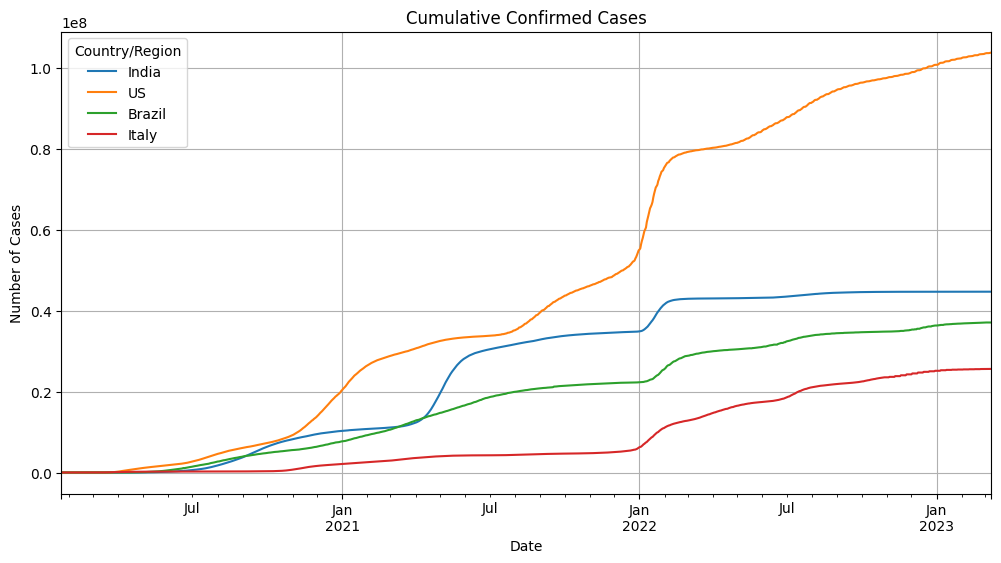

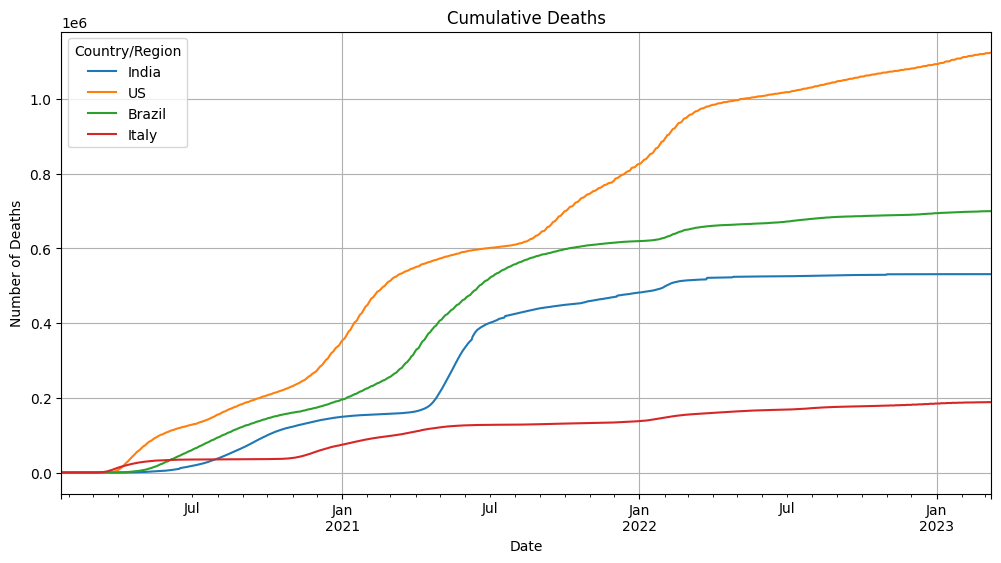

In [5]:
import matplotlib.pyplot as plt

# Choose countries to compare
countries = ['India', 'US', 'Brazil', 'Italy']

# Plot confirmed cases
confirmed_T[countries].plot(figsize=(12, 6), title='Cumulative Confirmed Cases')
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()

# Plot death cases
deaths_T[countries].plot(figsize=(12, 6), title='Cumulative Deaths')
plt.xlabel("Date")
plt.ylabel("Number of Deaths")
plt.grid(True)
plt.show()


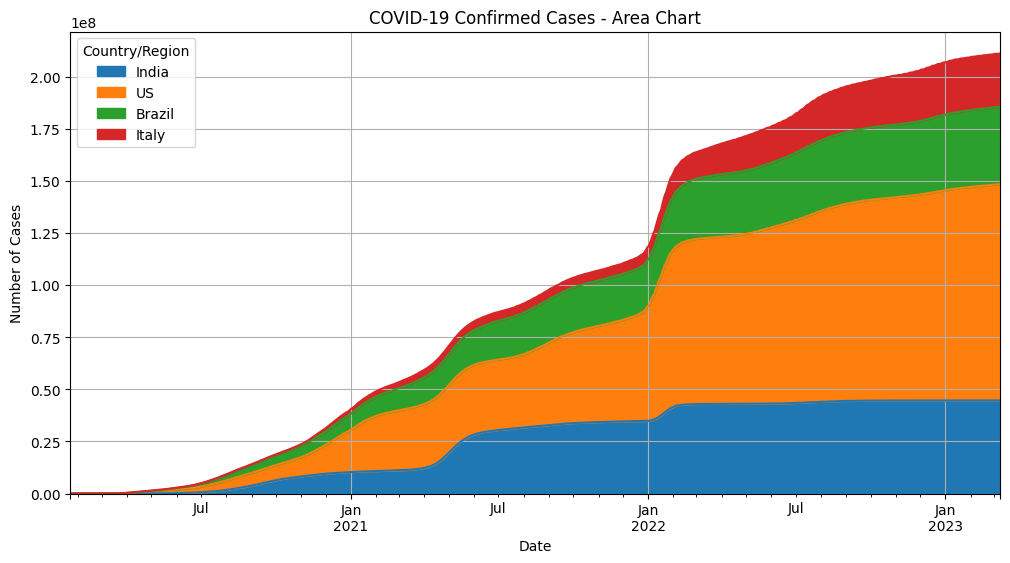

In [6]:
confirmed_T[countries].plot.area(figsize=(12, 6), title='COVID-19 Confirmed Cases - Area Chart')
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(True)
plt.show()


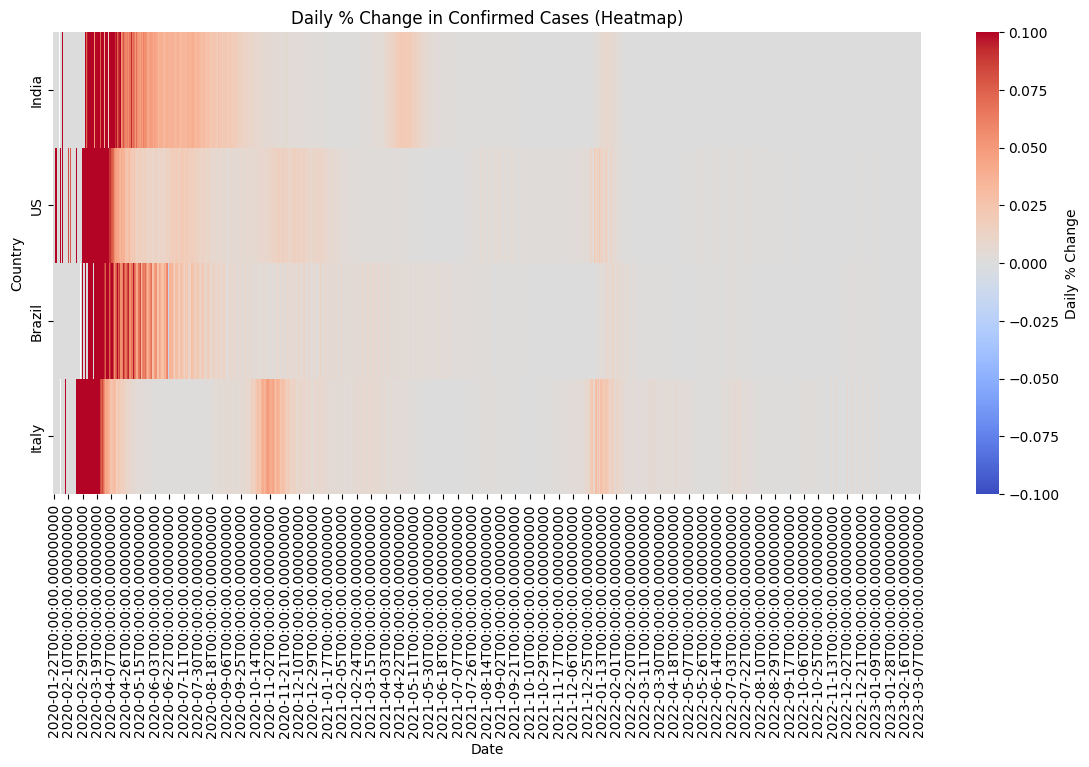

In [7]:
import seaborn as sns

# Normalize data
heatmap_data = confirmed_T[countries].pct_change().fillna(0)
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data.T, cmap="coolwarm", cbar_kws={'label': 'Daily % Change'})
plt.title("Daily % Change in Confirmed Cases (Heatmap)")
plt.xlabel("Date")
plt.ylabel("Country")
plt.show()
